<a href="https://colab.research.google.com/github/MennaMahmoud116/R-Project-1/blob/main/Microarray_Analysis_%7C_R_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GSE5583**
Negative and positive regulation of gene expression by mouse histone deacetylase 1 [PMID: 16940178](https://pubmed.ncbi.nlm.nih.gov/16940178/)
---

Menna T-allah Mahmoud Abdallahi

Analyzizing a microarray dataset using R. The dataset was published with a study that investigated the effect of knocking out histone deacetylase 1 on the global transcriptome. The purpose of the project to identify a differentially expressed gene and comment on its possible association with the knocking out histone deacetylase 1. 

### Loading the data

In [ ]:
data = read.table ("https://raw.githubusercontent.com/ahmedmoustafa/Notebooks/master/data/GSE5583.tsv", row.names = 1, header = TRUE)
head(data)

,WT1,WT2,WT3,KO1,KO2,KO3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
100001_at,11.5,5.6,69.1,15.7,36.0,42.0
100002_at,20.5,32.4,93.3,31.8,14.4,22.9
100003_at,72.4,89.0,79.2,80.5,130.1,86.7
100004_at,261.0,226.2,365.1,432.0,447.3,288.1
100005_at,1086.2,1555.6,1487.1,1062.2,1365.9,1436.2
100006_at,49.7,52.9,15.0,25.8,48.8,54.8


In [ ]:
dim(data)

[1] 12488     6

###Converting the data frame to a matrix

In [ ]:
data = as.matrix(data)

In [ ]:
head(data)

,WT1,WT2,WT3,KO1,KO2,KO3
100001_at,11.5,5.6,69.1,15.7,36.0,42.0
100002_at,20.5,32.4,93.3,31.8,14.4,22.9
100003_at,72.4,89.0,79.2,80.5,130.1,86.7
100004_at,261.0,226.2,365.1,432.0,447.3,288.1
100005_at,1086.2,1555.6,1487.1,1062.2,1365.9,1436.2
100006_at,49.7,52.9,15.0,25.8,48.8,54.8


###Assigning Variables to the matrix.

In [ ]:
number_of_genes = nrow(data)
number_of_genes

[1] 12488

###Exploring, checking the behavior of the data

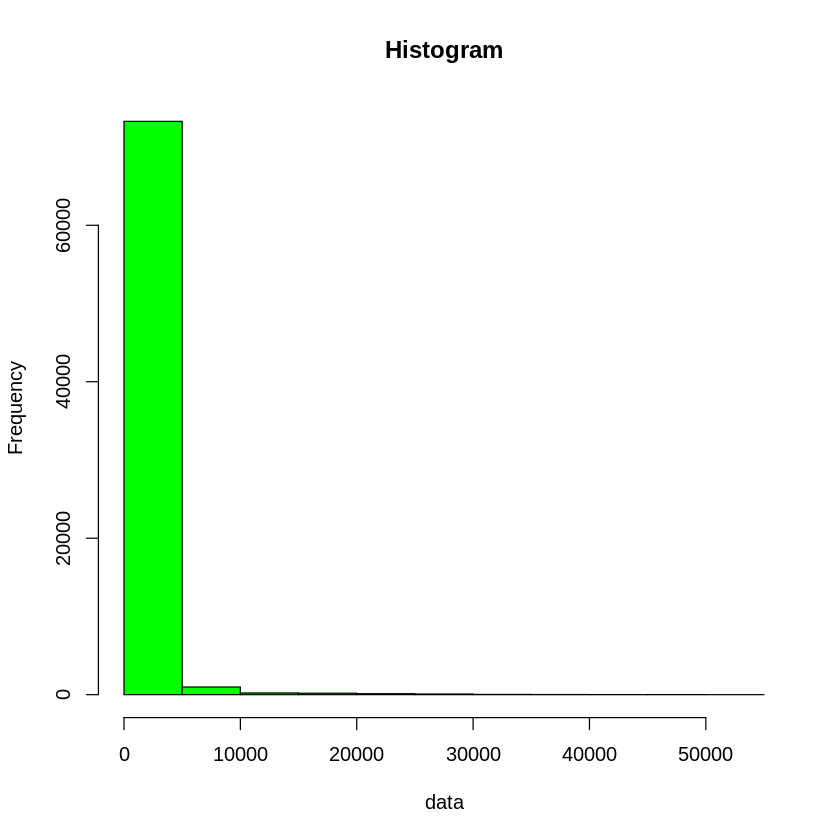

In [ ]:
hist(data, col = "green", main="Histogram")

Commenting on the histogram: 
- X-axis is the expression values. 
- The transcripts express low gene expression. 
- The histogram is very right skewed.

###Transformation of the data by log 2



We are doing log transformation to ensure normality, to be able to use statistical tests.




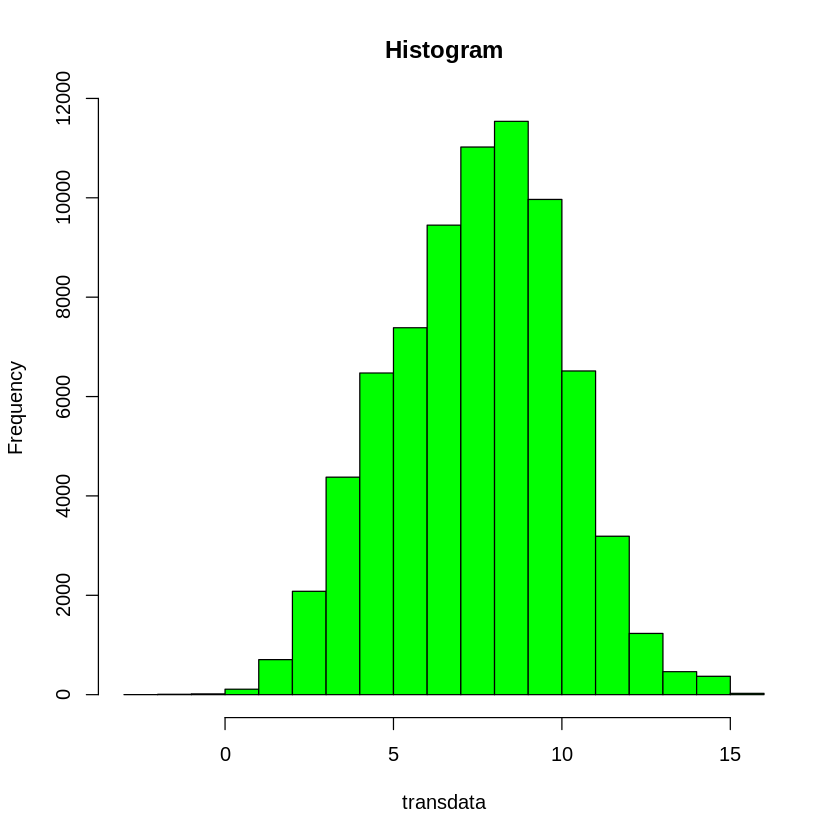

In [ ]:
transdata = log2(data)
hist(transdata, col = "green", main="Histogram")

Commenting on the histogram:
- The histogram is now appeared to be normally distributed.

###Constructing a Boxplot

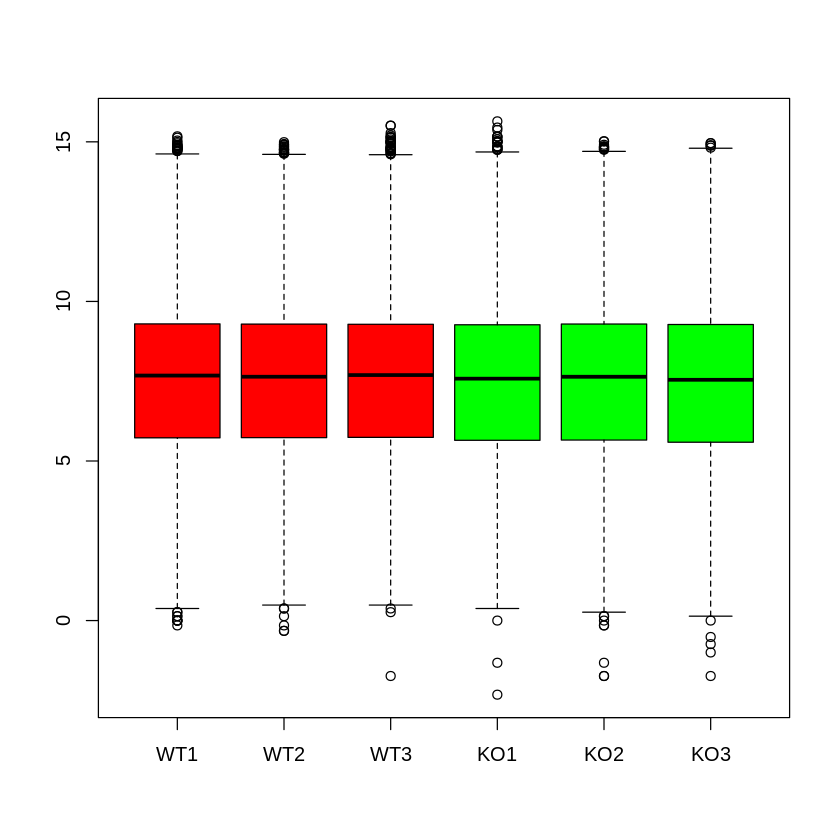

In [ ]:
colors = c(rep("red", 3), rep("green", 6))
boxplot(transdata, col = colors)

They are overall similar.

###Clustering

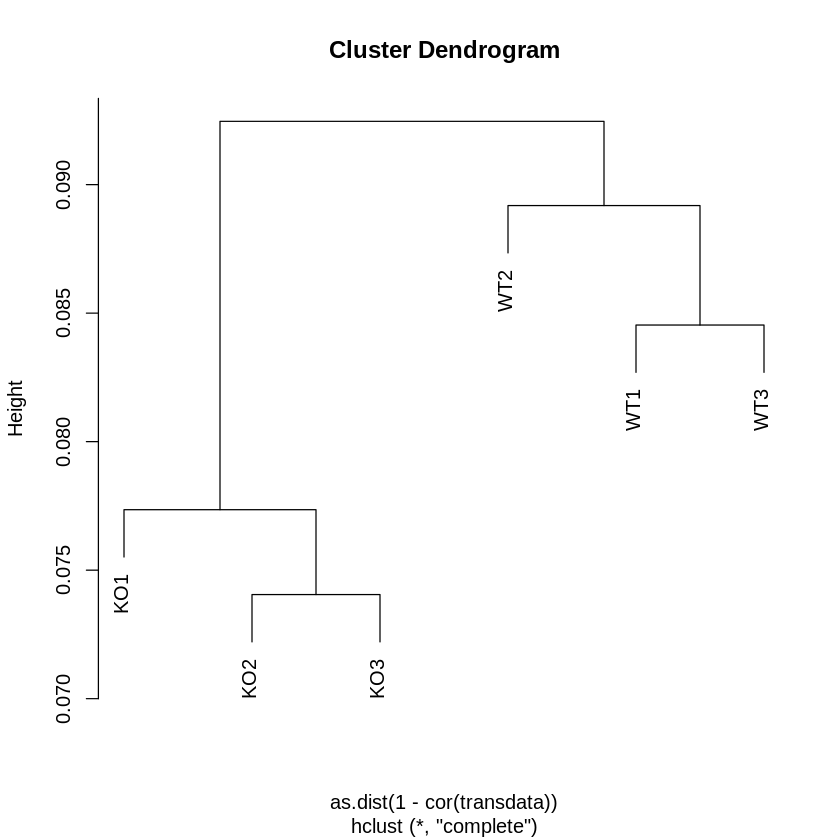

In [ ]:
hc = hclust(as.dist(1-cor(transdata)))
plot(hc)

The wildtypes are significantly different from the Knockouts


*  Wild type 1 and Wild type 3 are similar to each other than Wild type 2.
*  Knockout 2 and Knockout 3 are similar to each other than Knockout 1.



###Splitting data matrix into two
1 for the wildtypes coloumns and 1 for the knockouts coloumns

In [ ]:
WT = transdata[,1:3]
head(WT)

,WT1,WT2,WT3
100001_at,3.523562,2.485427,6.110614
100002_at,4.357552,5.017922,6.543805
100003_at,6.177918,6.475733,6.307429
100004_at,8.027906,7.821455,8.512148
100005_at,10.085074,10.603255,10.538286
100006_at,5.635174,5.725196,3.906891


In [ ]:
KO = transdata[,4:6]
head(KO)

,KO1,KO2,KO3
100001_at,3.972693,5.169925,5.392317
100002_at,4.990955,3.847997,4.517276
100003_at,6.330917,7.023477,6.437960
100004_at,8.754888,8.805099,8.170426
100005_at,10.052840,10.415636,10.488041
100006_at,4.689299,5.608809,5.776104


###Computing the Biological Significance

Calculating mean expressions

In [ ]:
WT.means = rowMeans(WT)
head(WT.means)

100001_at 100002_at 100003_at 100004_at 100005_at 100006_at 
 4.039868  5.306426  6.320360  8.120503 10.408872  5.089087

In [ ]:
KO.means = rowMeans(KO)
head(KO.means)

100001_at 100002_at 100003_at 100004_at 100005_at 100006_at 
 4.844978  4.452076  6.597451  8.576804 10.318839  5.358071

100001_at   100002_at   100003_at   100004_at   100005_at   100006_at 
 0.80511083 -0.85435054  0.27709146  0.45630111 -0.09003287  0.26898401

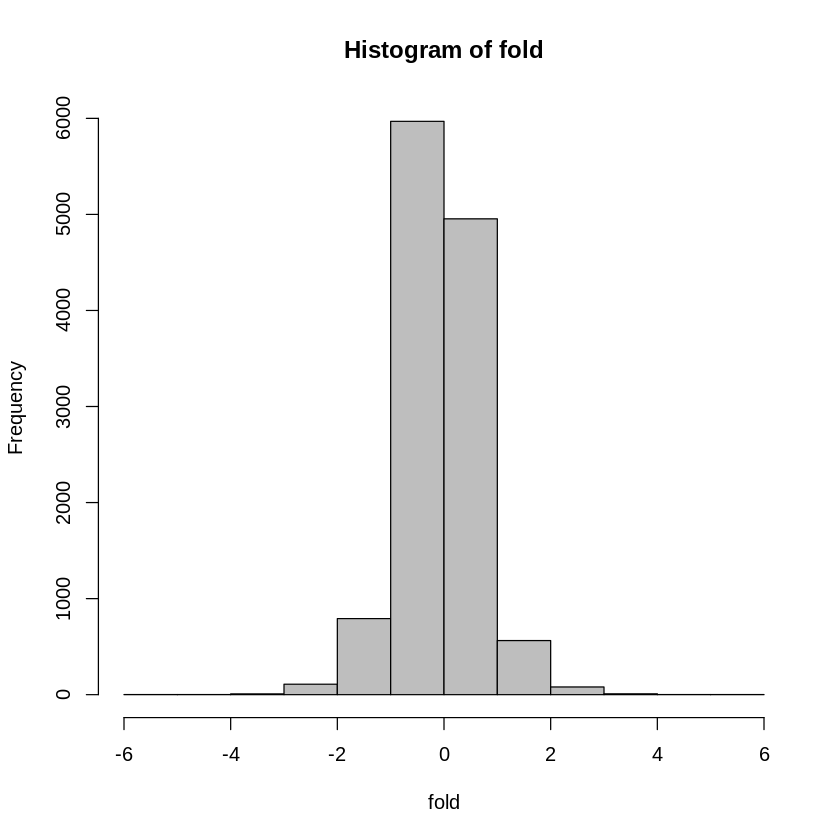

In [ ]:

fold = KO.means - WT.means
head(fold)
hist(fold, col = "gray")

###Scatter Plot

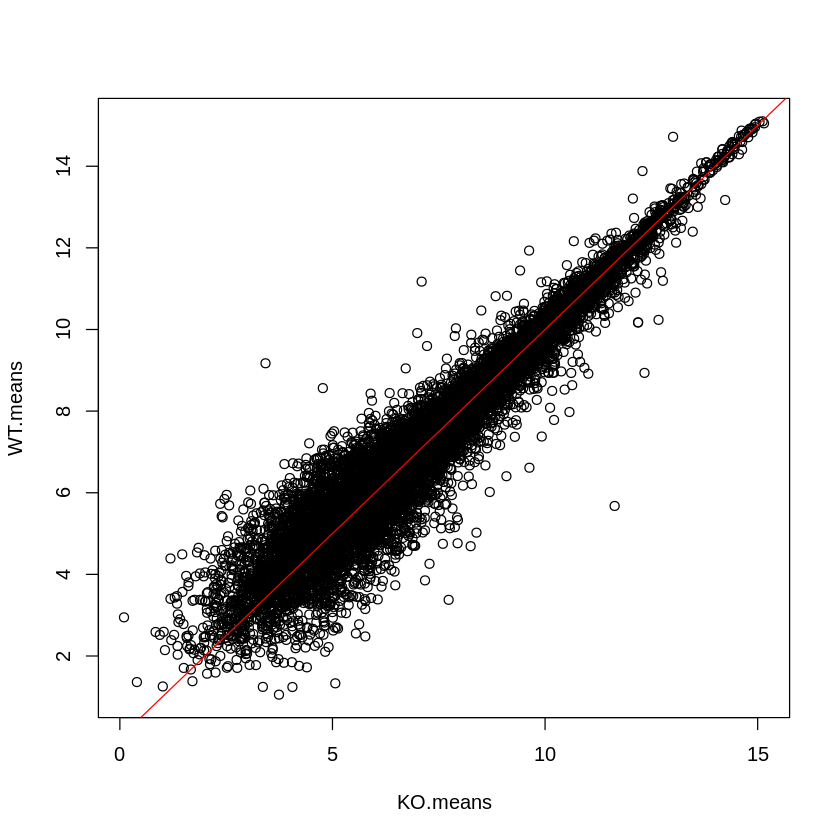

In [ ]:
plot(WT.means ~ KO.means)
abline(0,1,col="red")

- The majority of the genes are similar and equal, the closer they get to the diagonal line, the closer the similarity between Wildtype and Knockout.
- The genes of interest are the deviating genes from the diagonal. 

[1] 12488

[1] 0.5449730 0.3253745 0.3287830 0.1892376 0.6928410 0.7180077

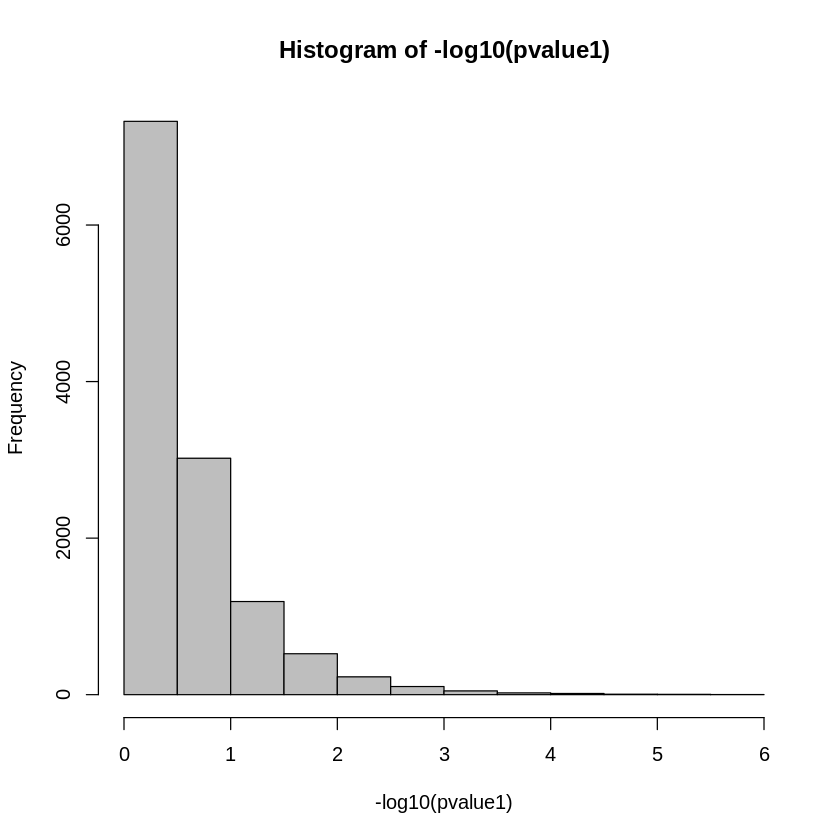

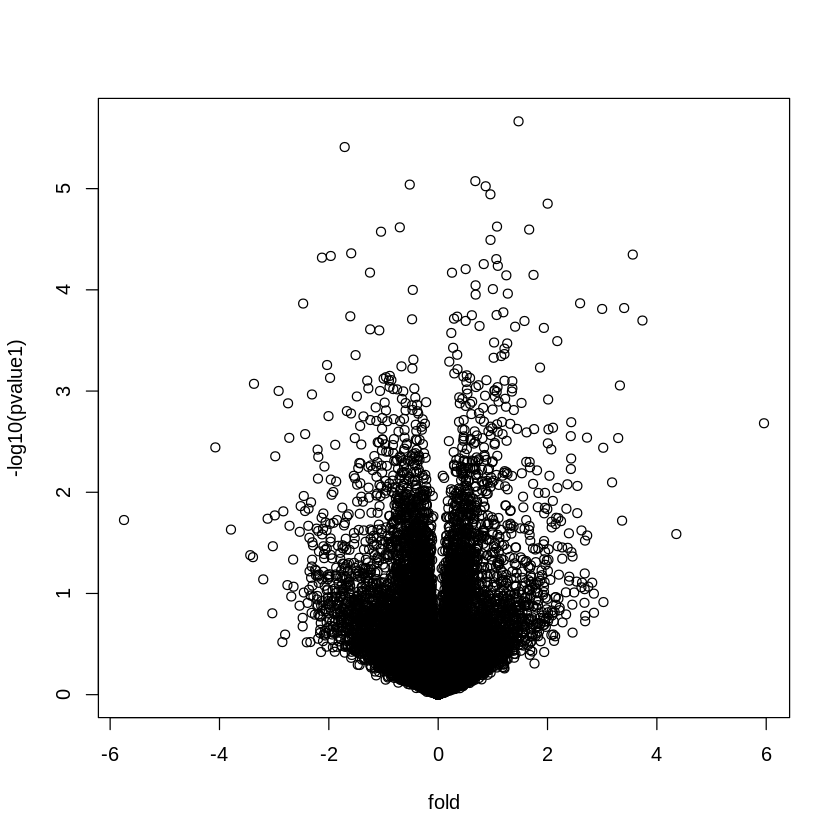

In [ ]:
pvalue = NULL
head(number_of_genes)
pvalue1 = NULL
for(i in 1 : number_of_genes) {
  x = WT[i, ]
  y = KO[i, ]
  if (mean(x) == mean(y))
  { pvalue1[i] = 1} else {
    pvalue1[i] = t.test(x, y)$p.value
  }
  }
head(pvalue1)
hist(-log10(pvalue1), col = "gray")
plot(-log10(pvalue1) ~ fold)

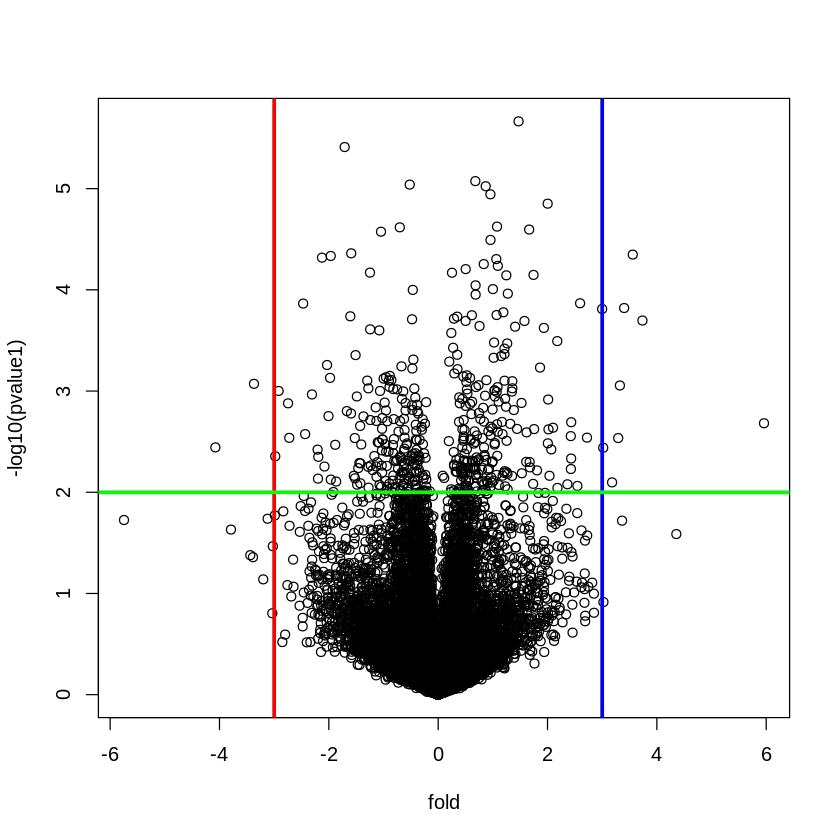

In [ ]:
fold_cutoff = 3
pvalue1_cutoff = 0.01
plot(-log10(pvalue1) ~ fold)
abline(v = fold_cutoff, col = "blue", lwd = 3)
abline(v = -fold_cutoff, col = "red", lwd = 3)
abline(h = -log10(pvalue1_cutoff), col = "green", lwd = 3)

In [ ]:
filter_by_fold= abs(fold) >= fold_cutoff
sum(filter_by_fold)
filter_by_pvalue1 = pvalue1 <= pvalue1_cutoff
sum(filter_by_pvalue1)
filter_combined = filter_by_fold & filter_by_pvalue1
sum(filter_combined)

[1] 21

[1] 429

[1] 10

In [ ]:
filtered = transdata[filter_combined,]
dim(filtered)
filtered

[1] 10  6

,WT1,WT2,WT3,KO1,KO2,KO3
101550_at,5.526695,5.4396231,6.221104,2.137504,2.906891,2.035624
101883_s_at,5.768184,6.1272206,5.133399,11.564292,11.679568,11.663514
160172_at,6.525129,6.2403143,7.073606,9.579882,9.534497,9.780868
160943_at,4.472488,4.7602209,4.837943,8.377211,8.236971,8.133913
162395_r_at,2.847997,1.7224660,2.867896,6.050937,6.083213,5.181898
92331_at,5.361066,4.0179219,4.906891,7.787250,7.792465,8.247928
93028_at,8.886916,9.0834793,8.838889,12.290652,12.353588,12.369979
94085_at,3.498251,4.2630344,3.797013,6.639522,7.338959,7.551516
95291_r_at,1.632268,0.9259994,1.432959,5.189825,5.303781,4.705978
96046_at,11.182022,11.1030911,11.233500,6.886306,6.782671,7.622784


I got 10 significantly different genes by using a cut-off equal to 3

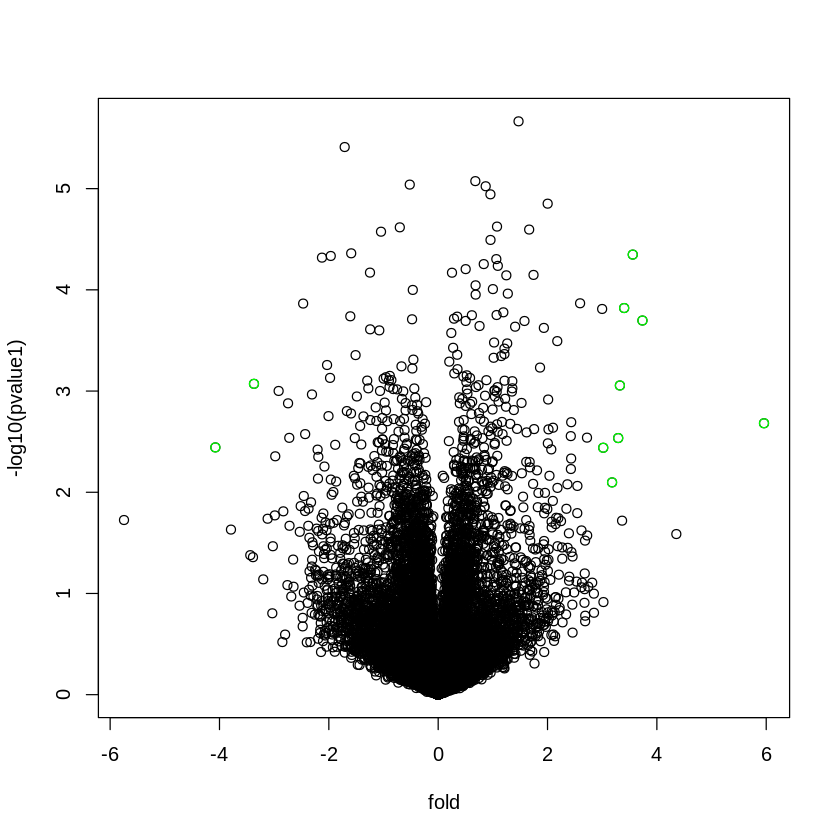

In [ ]:
plot(-log10(pvalue1)~fold)
points(-log10(pvalue1[filter_combined]) ~ fold[filter_combined], col="green")

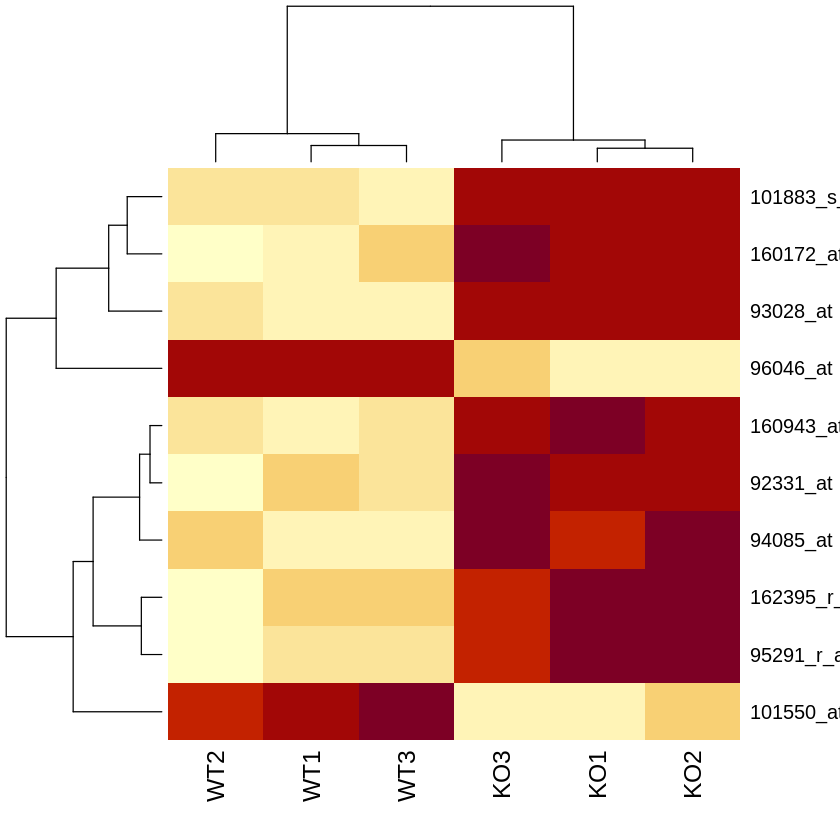

In [ ]:
heatmap(filtered)

- The genes are on Y-axis.
- The samples are on X-axis.
- The heat map shows the expression of the genes in each sample.
- The cluster on the top is for the samples. 
  - Two clusters, one for the knock out and wildtype.
- The cluster on the left is for the genes.
  - Genes that are similar to each other are grouped together.
- We are not interested in looking for genes have similar values instead we are insterested to look for genes who have similar expression profile, where they behave in the same pattern. Genes down-regulated in knockout and genes that are up-regulated in wildtype to be clustered together and vice versa. So we will do the following clustering


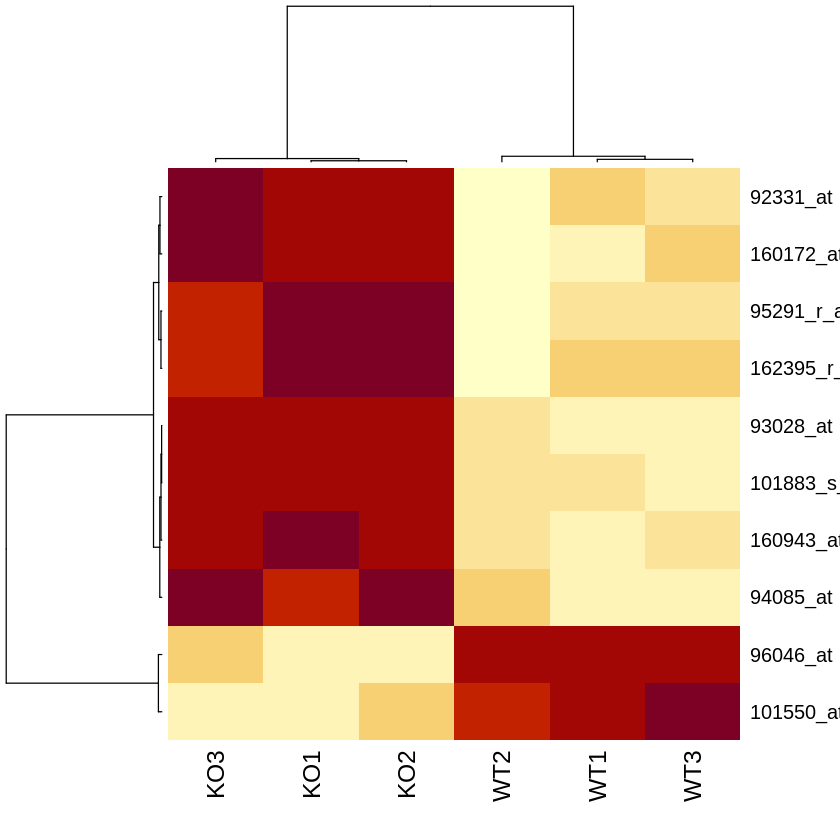

In [ ]:
row_dendrogram = as.dendrogram(hclust(as.dist(1-cor(t(filtered)))))
col_dendrogram = as.dendrogram(hclust(as.dist(1-cor(filtered))))
heatmap(filtered, Rowv = row_dendrogram, Colv = col_dendrogram)

In [ ]:
install.packages("gplots")
library(gplots)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’



Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess




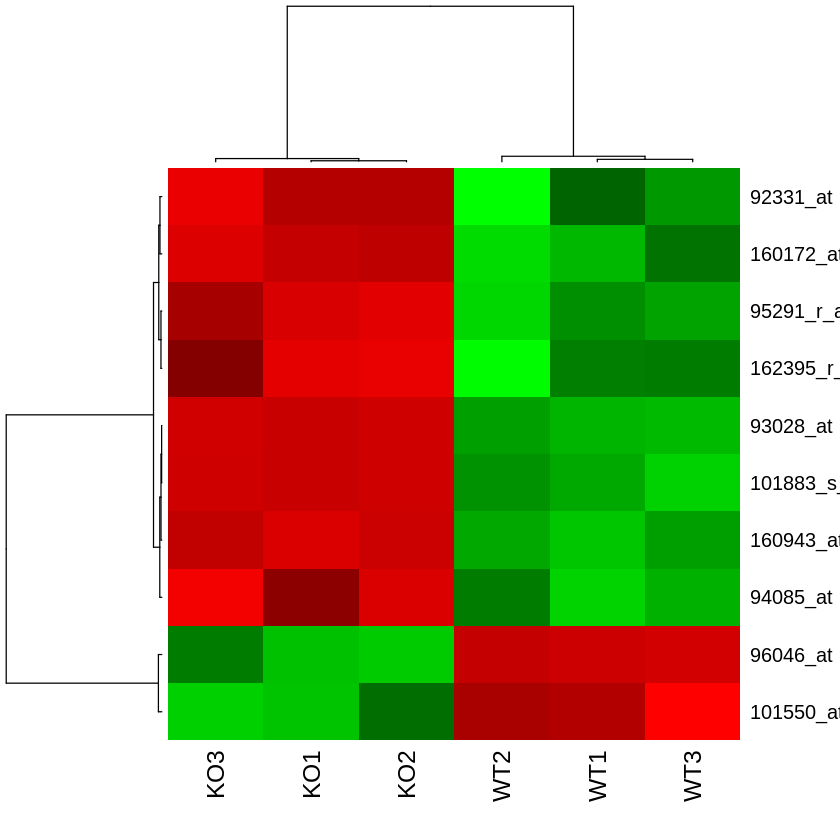

In [ ]:
heatmap(filtered, Rowv = row_dendrogram, Colv = col_dendrogram, col = greenred(1000))

Red represents up-regulated, high expression.
Green represents down-regulated, low expression. 

## **Annotation**
Uploading the 10 Ids of significantly different genes to https://david.ncifcrf.gov/home.jsp 

This is a gene list report, that shows the gene names of each ID

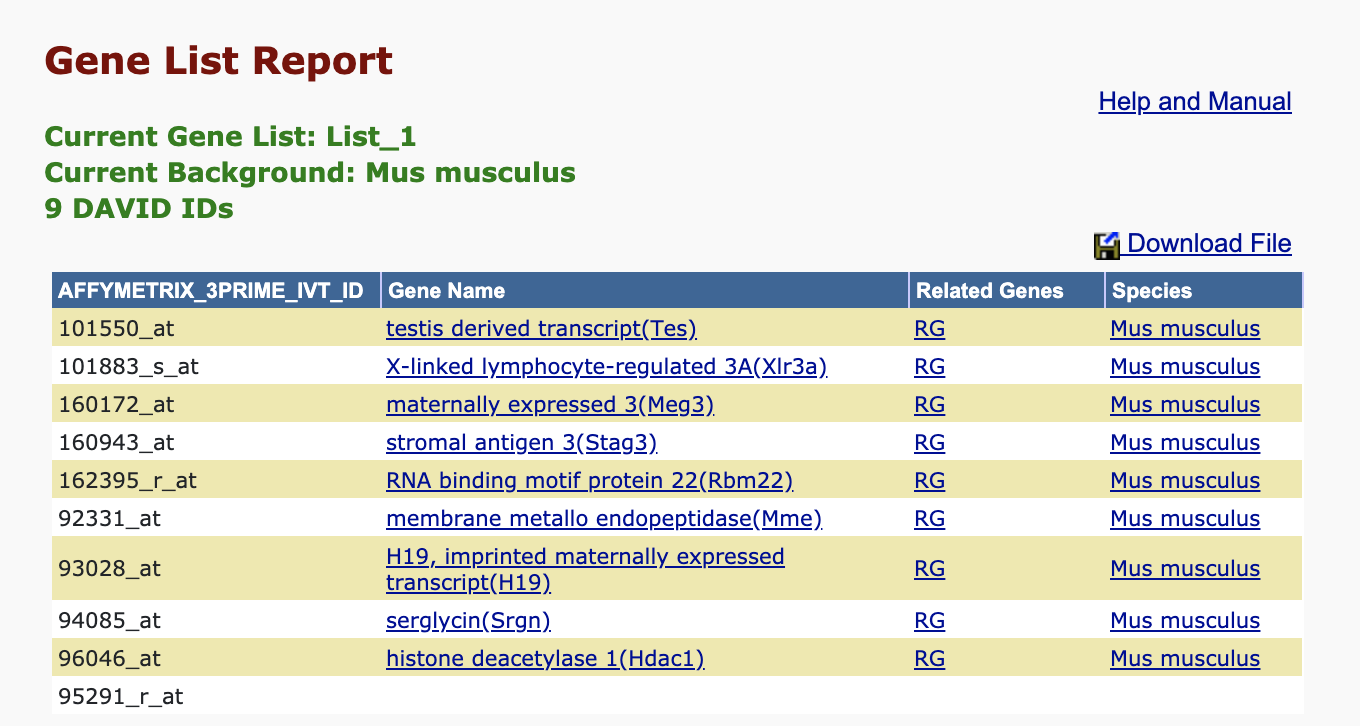

After doing a functional annotation clustering, it gives me 2 clusters. 

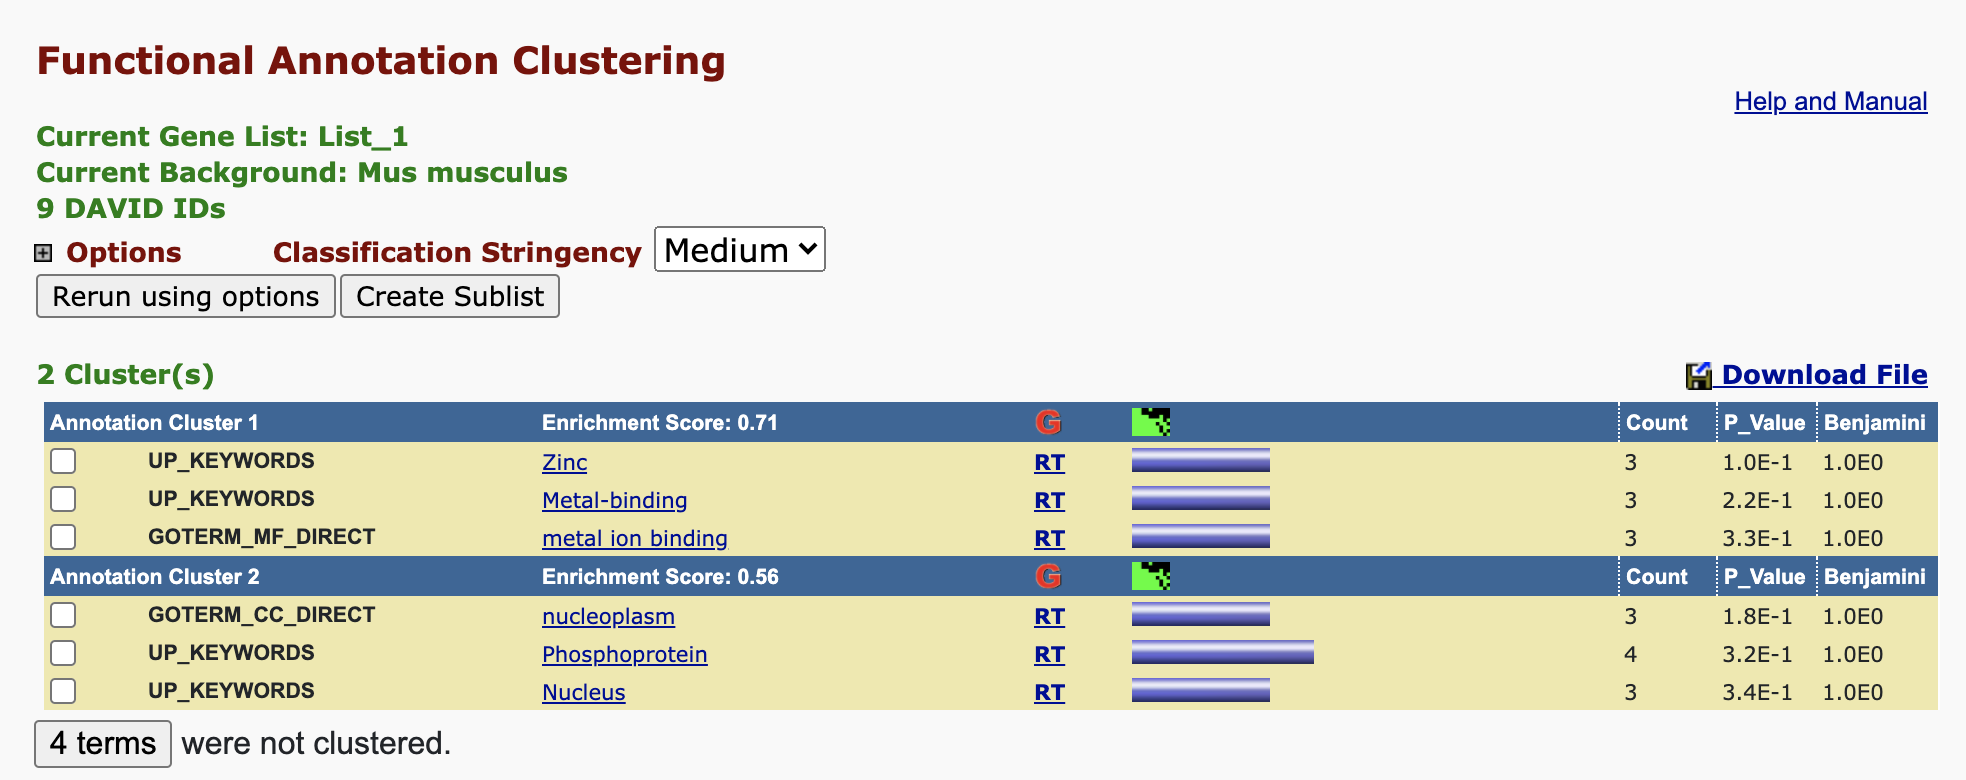

 I chose Zinc group to identify the differentially expressed genes and to comment on its possible association with the knocking out histone deacetylase 1

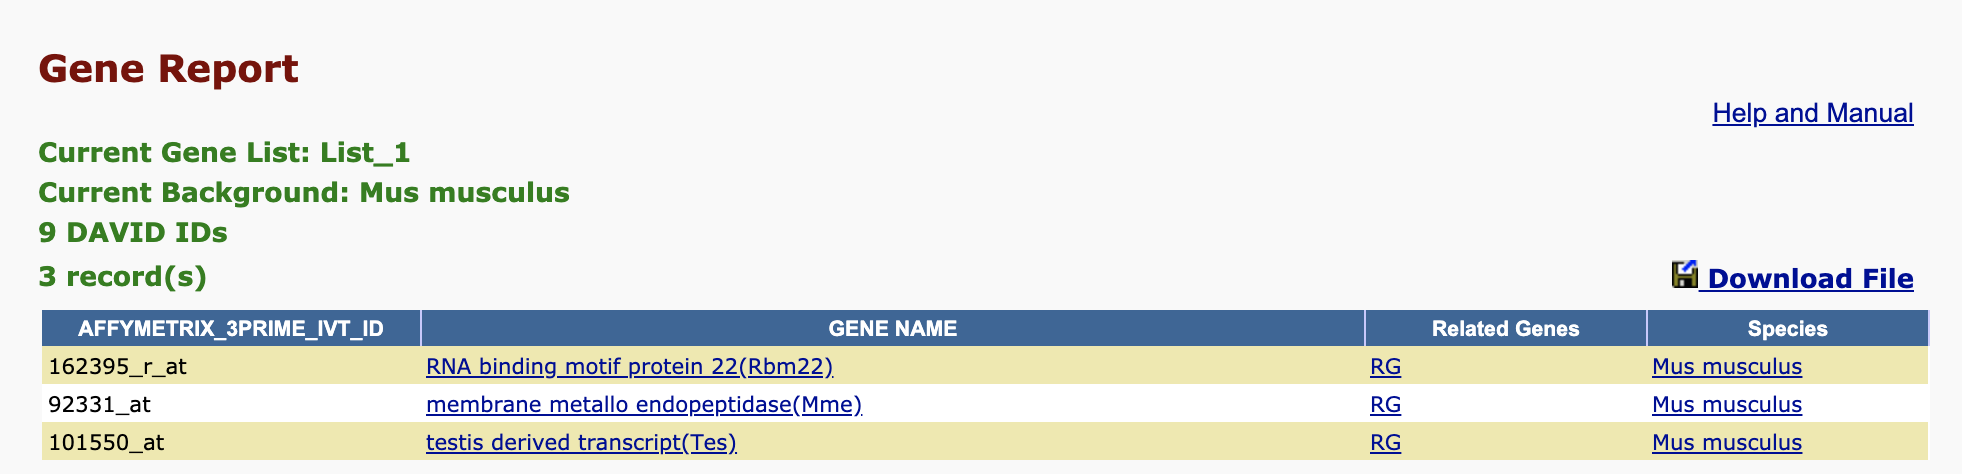

Here we can see that the Zinc group is made up of 3 genes:
162395_r_at, 92331_at, and 101550_at


By doing an additional code to separate the up-regulated genes from down-regualted:

In [ ]:
filter_by_fold= fold > fold_cutoff
sum(filter_by_fold)
filter_by_pvalue1 = pvalue1 <= pvalue1_cutoff
sum(filter_by_pvalue1)
filter_combined = filter_by_fold & filter_by_pvalue1
sum(filter_combined)
filtered = transdata[filter_combined,]
dim(filtered)
filtered

[1] 11

[1] 429

[1] 8

[1] 8 6

,WT1,WT2,WT3,KO1,KO2,KO3
101883_s_at,5.768184,6.1272206,5.133399,11.564292,11.679568,11.663514
160172_at,6.525129,6.2403143,7.073606,9.579882,9.534497,9.780868
160943_at,4.472488,4.7602209,4.837943,8.377211,8.236971,8.133913
162395_r_at,2.847997,1.7224660,2.867896,6.050937,6.083213,5.181898
92331_at,5.361066,4.0179219,4.906891,7.787250,7.792465,8.247928
93028_at,8.886916,9.0834793,8.838889,12.290652,12.353588,12.369979
94085_at,3.498251,4.2630344,3.797013,6.639522,7.338959,7.551516
95291_r_at,1.632268,0.9259994,1.432959,5.189825,5.303781,4.705978


In [ ]:
fold_cutoff2 = -3
filter_by_fold= fold < fold_cutoff2
sum(filter_by_fold)
filter_by_pvalue1 = pvalue1 <= pvalue1_cutoff
sum(filter_by_pvalue1)
filter_combined = filter_by_fold & filter_by_pvalue1
sum(filter_combined)
filtered = transdata[filter_combined,]
dim(filtered)
filtered

[1] 10

[1] 429

[1] 2

[1] 2 6

,WT1,WT2,WT3,KO1,KO2,KO3
101550_at,5.526695,5.439623,6.221104,2.137504,2.906891,2.035624
96046_at,11.182022,11.103091,11.233500,6.886306,6.782671,7.622784


By looking on the 2 matrices, we can observe that 8 genes were up-regulated after knocking out histone deacetylase 1 and 2 genes were down-regulated 